In [2]:
conda install geopandas

Solving environment: done

## Package Plan ##

  environment location: /Users/chen/opt/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.27 |                0         131 KB
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    certifi-2019.11.28         |           py37_0         156 KB
    cfitsio-3.470              |       hb33e7b4_2         823 KB
    click-plugins-1.1.1        |             py_0          11 KB
    cligj-0.5.0                |           py37_0          12 KB
    conda-4.8.1                |           py37_0         2.8 MB
    fiona-1.8.11               |   py37heeaa653_0         627 KB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    freexl-1.0.5               |       h1de35cc_0          39 KB
    gdal-3.0.2                 |   py37hbe65578_0         1.6 MB


In [11]:
conda install descartes

Solving environment: done

## Package Plan ##

  environment location: /Users/chen/opt/anaconda3

  added / updated specs:
    - descartes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    descartes-1.1.0            |             py_3           9 KB
    ------------------------------------------------------------
                                           Total:           9 KB

The following NEW packages will be INSTALLED:

  descartes          pkgs/main/noarch::descartes-1.1.0-py_3



descartes-1.1.0      | 9 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gp
import fiona
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

In [2]:
NY_GEO = gp.read_file("nyc/geo_export_ed1b9dba-ece4-470b-8a1e-2954c9ff29fe.shp", driver='shapefile')
CITI = pd.read_csv('201911-citibike-tripdata.csv', nrows=5000
                  )
NY_STATION = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
NY_LINES = gp.read_file('line/geo_export_1600b818-1305-4ac8-b2d4-6d1ad4428095.shp')
#station = pd.read_csv("http://web.mta.info/developers/data/nyct/subway/Stations.csv")

In [3]:
def line_up(row):
    return LineString([[row['start station longitude'], row['start station latitude']], [row['end station longitude'], row['end station latitude']]])

In [4]:
BLYN = NY_GEO[(NY_GEO.boro_name == 'Brooklyn')]

In [5]:
CITI_DF_END = gp.GeoDataFrame(
    CITI, 
    crs = {'init': 'epsg:4326'},
    geometry = gp.points_from_xy(CITI['end station longitude'], CITI['end station latitude']),
    )

In [6]:
STATION_DF = gp.GeoDataFrame(
    NY_STATION, 
    crs = {'init': 'epsg:4326'},
    geometry = gp.points_from_xy(NY_STATION['GTFS Longitude'], NY_STATION['GTFS Latitude']))

In [7]:
# "clip" a points layer to the boundary of a polygon
#BLYN_CITI = CITI_DF[CITI_DF.geometry.intersects(BLYN.geometry.unary_union)]
BLYN_CITI_END = CITI_DF_END[CITI_DF_END.geometry.intersects(BLYN.geometry.unary_union)]

In [8]:
# "clip" a points layer to the boundary of a polygon
BLYN_STATION = STATION_DF[STATION_DF.geometry.intersects(BLYN.geometry.unary_union)]

In [9]:
# "clip" a points layer to the boundary of a polygon
BLYN_LINES = NY_LINES[NY_LINES.geometry.intersects(BLYN.geometry.unary_union)]

In [10]:
BLYN_STATION['geometry']=BLYN_STATION['geometry'].buffer(.002)

/Users/chen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
BLYN_CITI_END = CITI_DF_END[CITI_DF_END.geometry.intersects(BLYN_STATION.geometry.unary_union)]

In [12]:
BLYN_CITI_END.groupby(['end station name']).count().sort_values(['gender'], ascending=False).head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry
end station name,,,,,,,,,,,,,,,
N 6 St & Bedford Ave,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Driggs Ave & N 9 St,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Bergen St & Smith St,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Hanson Pl & Ashland Pl,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Dean St & 4 Ave,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
DeKalb Ave & Hudson Ave,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Fulton St & Adams St,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Atlantic Ave & Fort Greene Pl,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Cadman Plaza West & Montague St,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [13]:
BLYN_CITI_START = gp.GeoDataFrame(
    BLYN_CITI_END.copy(),
    crs = {'init': 'epsg:4326'},
    geometry = gp.points_from_xy(BLYN_CITI_END['start station longitude'], BLYN_CITI_END['start station latitude']),
    )

In [14]:
BLYN_CITI_PATH = gp.GeoDataFrame(
    BLYN_CITI_END.copy(),
    crs = {'init': 'epsg:4326'}    )

In [15]:
line_up = BLYN_CITI_PATH.apply(line_up, axis=1)
BLYN_CITI_PATH['geometry'] = line_up
BLYN_CITI_PATH.set_geometry('geometry')
BLYN_CITI_PATH;

In [20]:
BLYN_CITI_PATH.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry
9,209,2019-11-01 00:01:03.4880,2019-11-01 00:04:33.3340,3580,St Johns Pl & Washington Ave,40.673724,-73.963161,3584,Eastern Pkwy & Franklin Ave,40.670777,-73.957680,26481,Subscriber,1959,1,"LINESTRING (-73.96316 40.67372, -73.95768 40.6..."
20,354,2019-11-01 00:02:33.3060,2019-11-01 00:08:27.6240,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,3637,Fulton St & Waverly Ave,40.683239,-73.965996,21125,Subscriber,1977,1,"LINESTRING (-73.97265 40.68753, -73.96600 40.6..."
62,1237,2019-11-01 00:06:32.3130,2019-11-01 00:27:10.0980,315,South St & Gouverneur Ln,40.703554,-74.006702,3674,Jay St & York St,40.701403,-73.986727,30540,Subscriber,1996,1,"LINESTRING (-74.00670 40.70355, -73.98673 40.7..."
74,647,2019-11-01 00:07:49.3780,2019-11-01 00:18:37.0120,3041,Kingston Ave & Herkimer St,40.678907,-73.941428,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,27000,Customer,1969,0,"LINESTRING (-73.94143 40.67891, -73.93757 40.6..."
76,693,2019-11-01 00:08:07.1270,2019-11-01 00:19:40.9050,3041,Kingston Ave & Herkimer St,40.678907,-73.941428,3064,Myrtle Ave & Lewis Ave,40.696820,-73.937569,34940,Customer,1969,0,"LINESTRING (-73.94143 40.67891, -73.93757 40.6..."


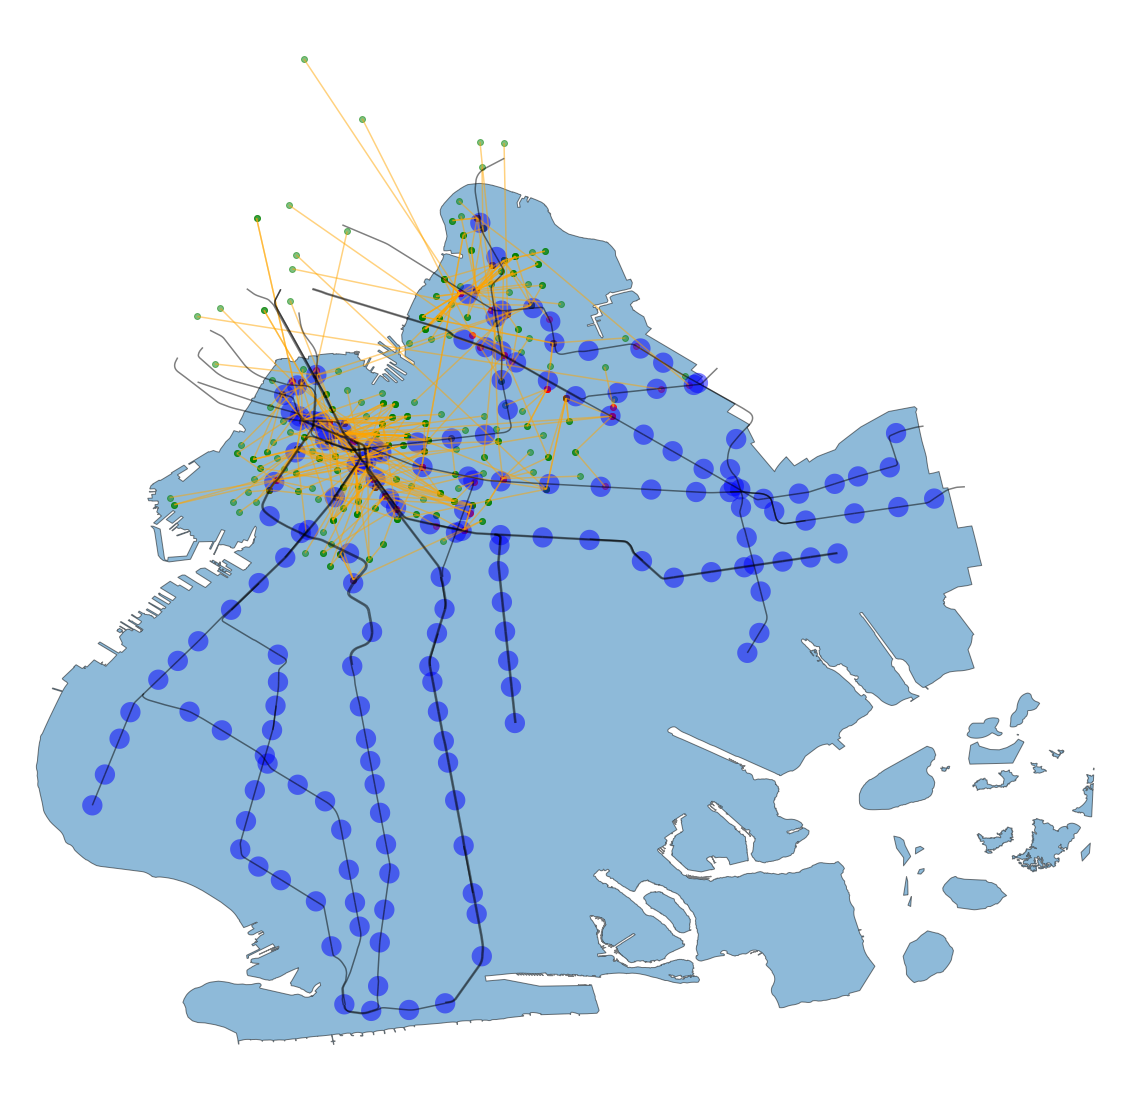

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))
BLYN.plot(alpha=.5,edgecolor='black', ax=ax)
BLYN_CITI_PATH.plot(alpha=.5,color='orange', ax=ax)
BLYN_CITI_END.plot(alpha=.5, marker='o', color='red', ax=ax)
BLYN_CITI_START.plot(alpha=.5, marker='o', color='green', ax=ax)
BLYN_STATION.plot(alpha=.5, color='blue', ax=ax)
BLYN_LINES.plot(alpha=.5,color='black', ax=ax)
plt.axis('equal')
ax.set_axis_off()